In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib  inline
sns.set_color_codes("pastel")

In [2]:
df = pd.read_csv('ign.csv')

Clean Data, mapping by platform by company & type

In [3]:
# check columnnames of dataframe
df.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [4]:
# combine year, month, date to datetime value in pandas
df["date"] = pd.to_datetime(df.release_year * 10000 + df.release_month * 100 + df.release_day, format='%Y%m%d')

In [5]:
# platform by company
Microsoft = ["Xbox", "Xbox 360", "Xbox One","Windows Phone"]
Nintendo = ["Nintendo DS","Nintendo 64 ","Nintendo DSi","Nintendo 3DS","Nintendo 64DD","New Nintendo 3DS"
            "GameCube","Game Boy Advance","Game Boy Color","Wii U","Wii","NES","Super NES"]
Sega =["Sega CD","Sega 32X", "Genesis","Dreamcast","Master System","Saturn","Sega CD","dreamcast VMU"] 
Sony = ["PlayStation","PlayStation 2","PlayStation 3","PlayStation 4","PlayStation Portable","PlayStation Vita"]
SNK = ["NeoGeo","NeoGeo Pocket Color"]
Bandai = ["WonderSwan","WonderSwan Color"]
Apple = ["iPhone","iPad","iPod"]

def mapping_company(item):
    if item in  Microsoft:
        return("Microsoft")
    elif item in Nintendo:
        return("Nintendo")
    elif item in Sega:
        return("Sega")
    elif item in Sony:
        return("Sony")
    elif item in Apple:
        return("Apple")
    elif item in SNK:
        return ("SNK")
    elif item in Bandai:
        return ("Bandi")
    return ("Others")

In [6]:
df["company"] = df.platform.map(mapping_company)

In [7]:
# platform by harware type
Computer = ["PC", "Macintosh", "Linux", "Commodore 64/128", "SteamOS"]
Console = ["PlayStation 2", "Xbox 360", "Wii", "PlayStation 3", "PlayStation", "Xbox",
           "GameCube", "Nintendo 64", "Dreamcast", "PlayStation 4", "Xbox One", "Wii U", "Genesis",
           "NES", "TurboGrafx-16", "Super NES", "Sega 32X", "Master System", "Saturn",
           "Atari 2600", "Atari 5200", "TurboGrafx-CD", "Ouya", "NeoGeo","Nintendo 64DD"]
Portable = ["Nintendo DSi", "PlayStation Portable", "Game Boy Advance", "Game Boy Color", "Nintendo 3DS",
            "PlayStation Vita" , "Lynx", "NeoGeo Pocket Color", "Game Boy", "WonderSwan",
            "New Nintendo 3DS", "WonderSwan Color", "dreamcast VMU","Nintendo DS"]
Mobile = ["iPhone", "iPad", "Android", "Windows Phone", "iPod", "Pocket PC", "Windows Surface", "N-Gage"]
Arcade = ["Arcade", "Vectrex"]

In [8]:
def mapping_type(item):
    if item in Computer:
        return("Computer")
    elif item in Console:
        return("Console")
    elif item in Portable:
        return("Portable")
    elif item in Mobile:
        return("Mobile")
    elif item in Arcade:
        return("Arcade")
    return ("Others")
df["type"] =df.platform.map(mapping_type)

In [9]:
df = df.loc[:,["title","platform","score","genre","date", "company","type","release_year","release_month","release_day"]]
df.head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12
2,Splice: Tree of Life,iPad,8.5,Puzzle,2012-09-12,Apple,Mobile,2012,9,12
3,NHL 13,Xbox 360,8.5,Sports,2012-09-11,Microsoft,Console,2012,9,11
4,NHL 13,PlayStation 3,8.5,Sports,2012-09-11,Sony,Console,2012,9,11


Step 2: read the file which contains the release date of hardwares, and join to game data file

In [10]:
df1 = pd.read_csv('console_release.csv')

In [11]:
df1["date"] = pd.to_datetime(df1.year * 10000 + df1.month * 100 + df1.day, format='%Y%m%d')

In [12]:
df1 = df1.loc[:,["Console","date"]]

In [13]:
df1.columns = ["platform","console_date"]

In [14]:
# history of the gaming platforms by release date 
df1 = df1.sort_values("console_date")
df1 

,platform,console_date
19,Genesis,1988-10-29
5,PlayStation,1994-12-03
11,Nintendo 64,1996-06-23
10,Game Boy Color,1998-10-21
12,Dreamcast,1998-11-27
0,PlayStation 2,2000-03-04
8,Game Boy Advance,2001-03-21
9,GameCube,2001-09-14
6,Xbox,2001-11-15
4,Nintendo DS,2004-11-21


In [15]:
df_type = pd.merge(df, df1, on=["platform"])

In [16]:
df_type.head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day,console_date
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012-09-12,Sony,Portable,2012,9,12,2011-12-17
2,Madden NFL 13,PlayStation Vita,6.0,Sports,2012-08-24,Sony,Portable,2012,8,24,2011-12-17
3,FIFA Soccer 13,PlayStation Vita,4.0,Sports,2012-10-12,Sony,Portable,2012,10,12,2011-12-17
4,New Little King's Story,PlayStation Vita,5.8,RPG,2012-10-11,Sony,Portable,2012,10,11,2011-12-17


# Part 1: Explore number of releases

## Question 1: What are the most popular year, month, day to realse a game?

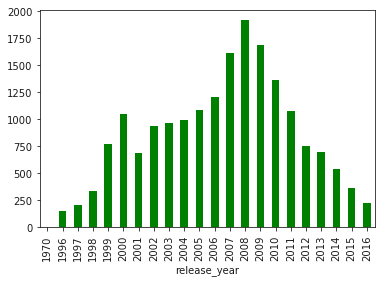

In [17]:
df.groupby('release_year').size().plot(kind='bar',color='green')

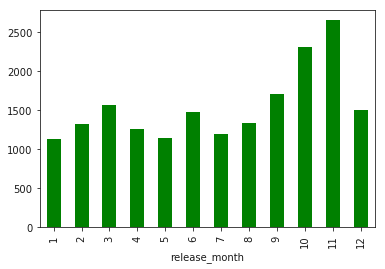

In [18]:
df.groupby('release_month').size().plot(kind='bar',color='green')

In [19]:
df.release_year.value_counts().head(1)

2008    1915
Name: release_year, dtype: int64

In [20]:
df.release_month.value_counts()

11    2657
10    2310
9     1707
3     1573
12    1505
6     1483
8     1338
2     1327
4     1264
7     1190
5     1143
1     1128
Name: release_month, dtype: int64

In [21]:
# the total percentage of 4th quarter releases 
len(df[df.release_month.isin([10,11,12])])/len(df) * 100

34.748993288590604

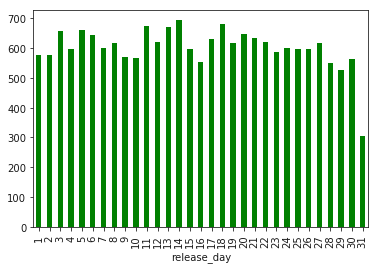

In [22]:
df.groupby('release_day').size().plot(kind='bar',color='green')

In [23]:
df.release_day.value_counts().head(3)

14    693
18    680
11    673
Name: release_day, dtype: int64

In [24]:
# top number of games released date
df.date.value_counts().head(10)

1999-07-06    73
1996-11-25    64
1996-11-21    33
1996-11-26    28
2009-11-03    25
2008-11-24    24
2006-11-22    23
2007-11-20    23
2007-11-13    23
2000-10-23    21
Name: date, dtype: int64

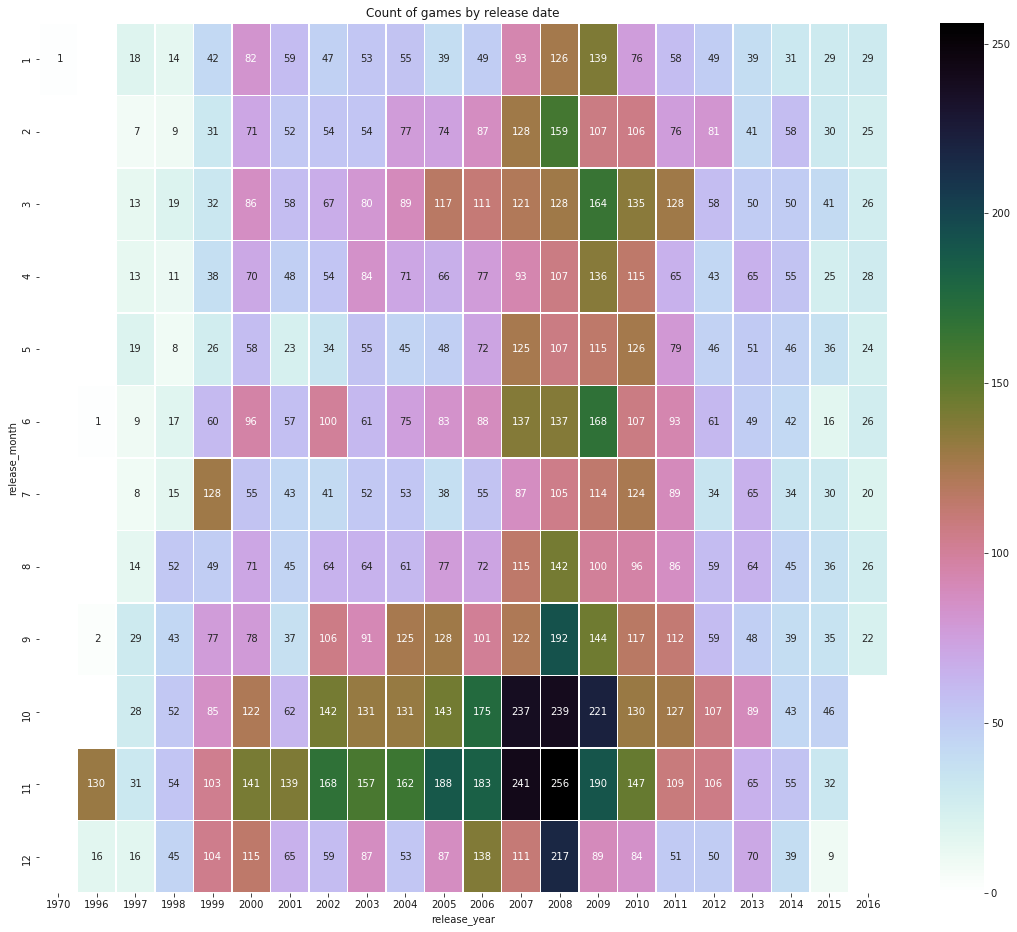

In [25]:
count_date = pd.pivot_table(df,values=['score'],index=['release_month'],
                             columns=['release_year'],aggfunc='count',margins=False)
plt.figure(figsize=(19,16))
sns.heatmap(count_date.score,linewidths=.5,annot=True,fmt='2.0f',vmin=0,cmap = plt.cm.cubehelix_r)
plt.title('Count of games by release date')

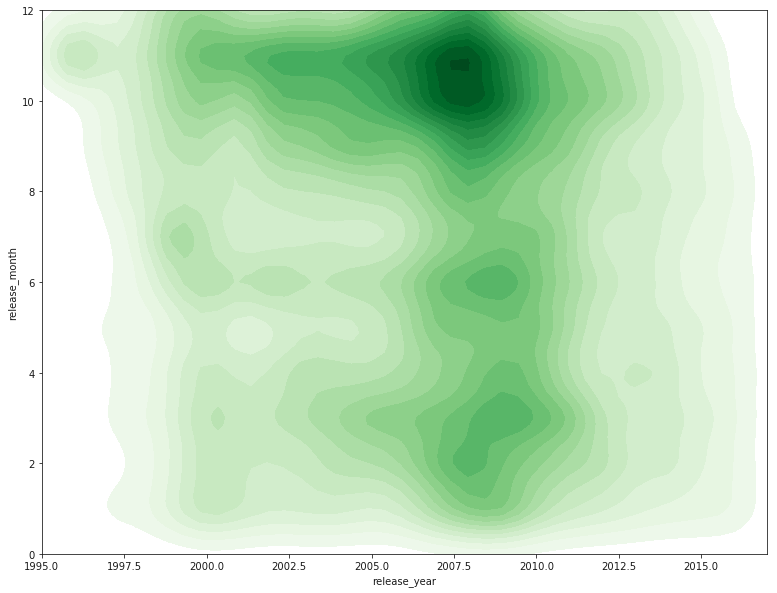

In [26]:
plt.figure(figsize=(13,10))
plt.xlim(1995,2017)
plt.ylim(0,12)
sns.kdeplot(df.release_year, df.release_month, n_levels=22, cmap="Greens", shade=True, shade_lowest=False)

## Conclusion 1:
### Dates that release most amounts of games: 
              Year 2008 : 1915 games
              Month 11 : 2657 games
              Day 14 : 693 games
              Date 1999-07-06 : 73 games
              The most popular month-day pair is 2008-11: 256 games 
              The combination of most popular year, month and day is 2008-11-14,
              when 28 games are relased, ranked number 6 popular date of all game history.
         

### Trend
    The first small peak is reach by year 2000 (4th top releases). With a slightly drop from 2000 to 2001, number of releases each year continued increasing till 2009. 2008, 2009 and 2007 are top 3 years that released most video games, indicating that game video industry is at its peak during these years. 

    Year 2000-2010, September-November has relatively more releases than other times.
    Year 2007-2008, October-Novermber are peak times for game releases

    Number of releases continued decreasing after 2009. Within each quarter, the last month of each quarter (month 3,6,9) has most games released except for 4th quarter. The 4th quarter anomly might due to holidays and vacation in December. 

    It's worth noticing that November, October and December, March and December are top 5 months for releasing games. The 4th quarter has 0.347489932885906% of total releases. However, the total releases on each day of the month is similar. 
              

## Question 2 : Popular releases by type, company, genre

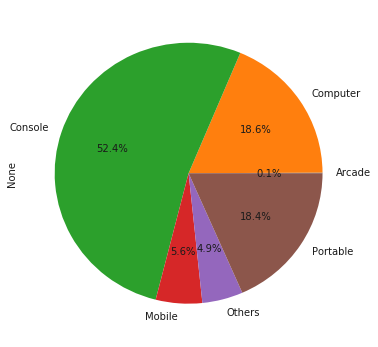

In [27]:
plt.figure(figsize=(6,6))
df.groupby('type').size().plot(kind='pie',autopct='%1.1f%%')

In [28]:
# percentage of game released per genre
pd.DataFrame(df.groupby('genre').size()/len(df)*100).sort_values(0,ascending = False ).head(3)

,0
genre,
Action,20.386577
Sports,10.287248
Shooter,8.644295


In [29]:
pd.DataFrame(df.groupby('platform').size()/len(df)*100).sort_values(0,ascending = False ).head(5)

,0
platform,
PC,18.093960
PlayStation 2,9.052349
Xbox 360,8.757047
Wii,7.334228
PlayStation 3,7.280537


In [30]:
pd.DataFrame(df.groupby('company').size()/len(df)*100).sort_values(0,ascending = False ).head(5)

,0
company,
Others,29.186577
Sony,27.162416
Nintendo,21.863087
Microsoft,14.357047
Apple,5.143624


## Conclusion 2: 
### Number of games releases by platform, genre, type ,and company (Top 3)
    Platform: 19.09% of games released on PC, 9.05% on PlayStation2, 8.75% on Xbox 360 
    Genre: 20.38% of games are action games, 10.287% sports, 8.644% shooter  
    Type: 52.4% of games released on a console,computer 18.6% and portables 18.4%
    Company: others 29.18%, Sony 27.16%, Nintendo 21.86%

# Question 3: Pattern of games releases counts each genre by year

In [31]:
top_genre = df.genre.value_counts().head(10)

In [32]:
top_genre.index

Index(['Action', 'Sports', 'Shooter', 'Racing', 'Adventure', 'Strategy', 'RPG',
       'Platformer', 'Puzzle', 'Action, Adventure'],
      dtype='object')

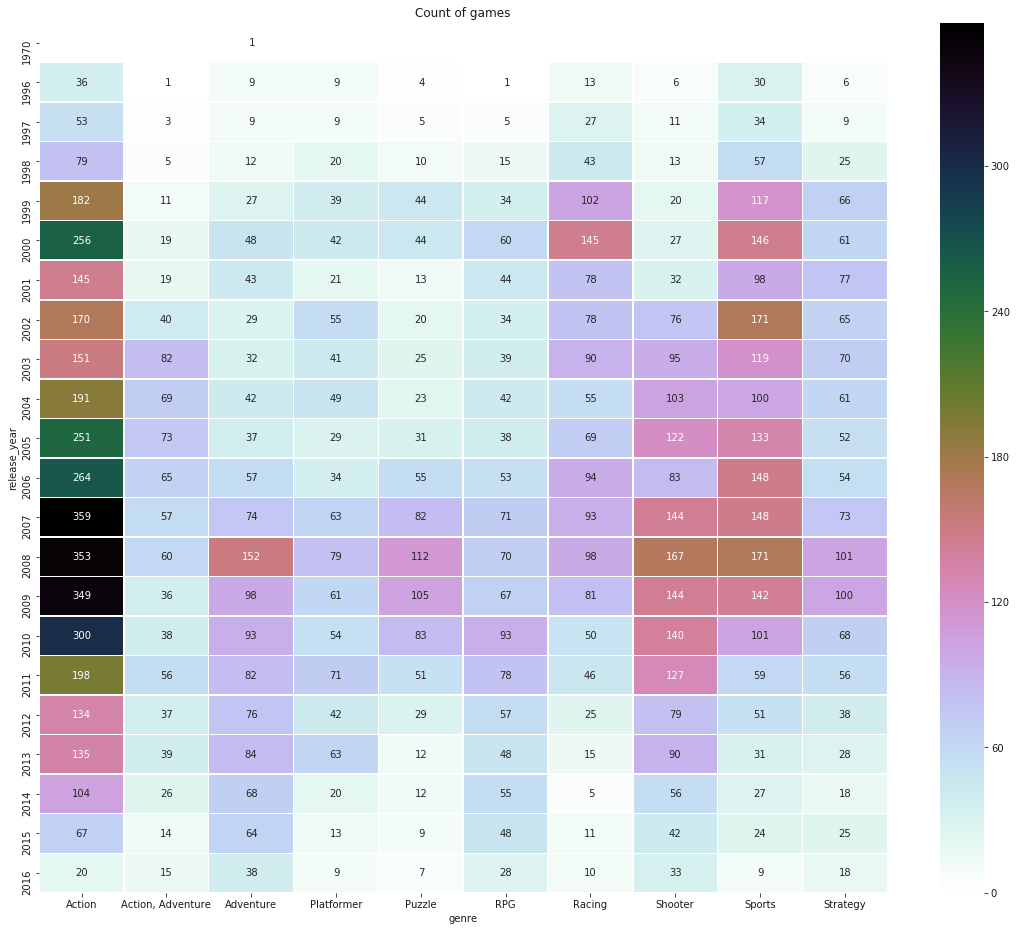

In [33]:
table_count = pd.pivot_table(df[df.genre.isin(top_genre.index)],values=['score'],index=['release_year'],
                             columns=['genre'],aggfunc='count',margins=False)
plt.figure(figsize=(19,16))
sns.heatmap(table_count.score,linewidths=.5,annot=True,fmt='2.0f',vmin=0,cmap = plt.cm.cubehelix_r)
plt.title('Count of games')

## Conclusion 3:
### Counts on genres & years 

##### By visulizing releases counts for each year on different genres through heatmap, we can see that:
    Year 2007, 2008 and 2009 has most releases for Action games. 
    Year 2008 is also the year of Adventure games, shooters game.   
    Year 2002 and Year 2008 tied, ranked number one on sports game genre.  
    


# Part 2: Explore relationship of review scores of games with other factors


## Question 1: The distribution and some statistics of the review scores? Is is normally distributed? 

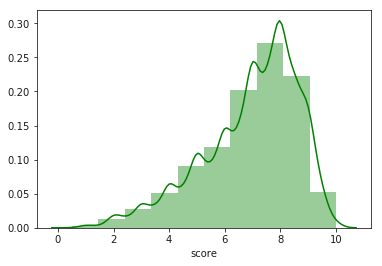

In [34]:
# check distribution of score
sns.distplot(df.score, bins = 10, color = "Green")

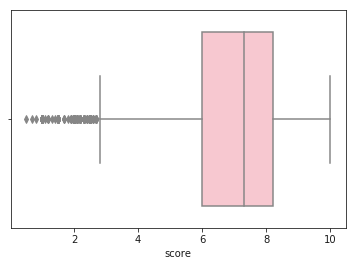

In [35]:
sns.boxplot(x="score", data = df,color = "pink" )

In [36]:
df.score.describe()

count    18625.000000
mean         6.950459
std          1.711736
min          0.500000
25%          6.000000
50%          7.300000
75%          8.200000
max         10.000000
Name: score, dtype: float64

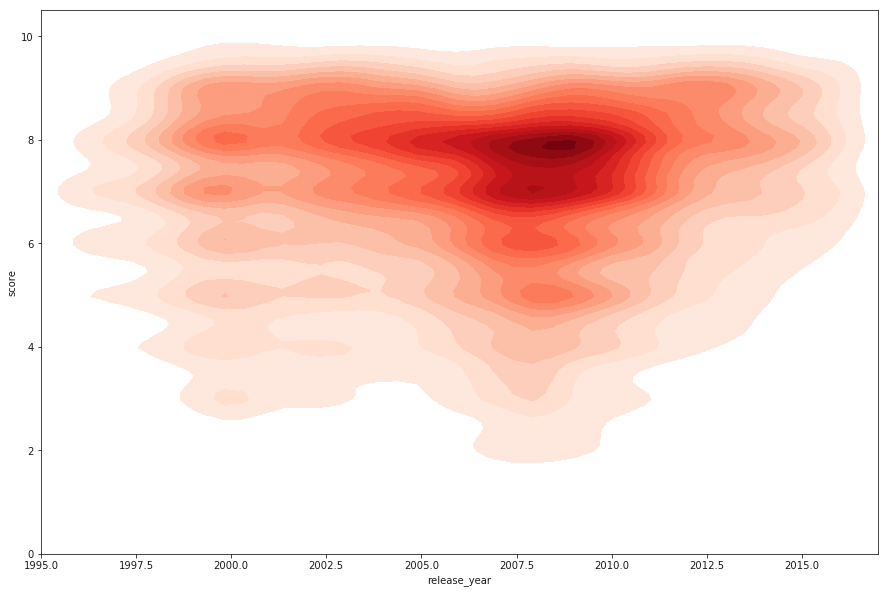

In [37]:
plt.figure(figsize=(15,10))
plt.ylim(0,10.5)
plt.xlim(1995,2017)
sns.kdeplot(df.release_year, df.score, n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

In [38]:
df.score.notnull().value_counts()

True    18625
Name: score, dtype: int64

# Conclusion 1: 
## Review score statistics
### There are 18625 games reviewed, with mean score of 6.950459 , max score 10 and min score 0.5. There is no missing value for score columns.  The distribution of review scores of games is skewed to left, with outliers on left side. IQR of review score is [6,8.2] 

## Question 2: Are review socres distribution same for all the platform type? Which has highest/lowest scores?

In [39]:
company_avg = pd.DataFrame(df.groupby("company").score.mean())

In [40]:
type_avg = pd.DataFrame(df.groupby("type").score.mean())

In [41]:
type_avg.colnames =["types","avg_score"]
company_avg.colnames = ["company","avg_score"]

In [42]:
type_avg.sort_values("score", ascending = False)

,score
type,
Mobile,7.306328
Computer,7.170675
Others,7.160742
Console,6.942591
Portable,6.589397
Arcade,6.069231


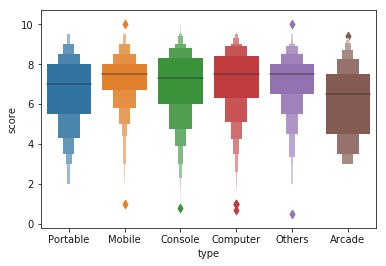

In [43]:
sns.lvplot(x="type", y = "score", data = df)

## Conclusion 2: 
### Review socre v.s. platform type

    Mobile games has highest average score (7.306)
    Arcade games has lowest average score(6.069)
    Portable games and acade games has stable scores (no outlier on both side)
    Mobile and other games tend to have both perfect reviews and worst reviews.
    Consle games and computer games tend to have worst reviews.


## Question 3: Are review socres distribution same for all the platform type? Which has highest/lowest scores?

In [44]:
company_avg.sort_values("score", ascending = False)

,score
company,
Apple,7.322025
Microsoft,7.177113
Others,7.141722
Sega,7.141579
SNK,7.121951
Sony,6.944614
Bandi,6.920000
Nintendo,6.446611


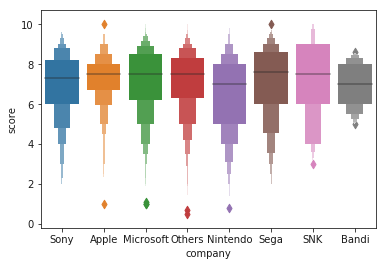

In [45]:
sns.lvplot(x="company", y = "score", data = df)

## Conclusion 3: 
### Review scores v.s. Platform Company
    Games on Apple devices have the highest average review scores (7.322)
    However, Games for Apple devices tends to both get highest scores and lowest socres.
    Games on Nintendo have lowest average review socres (6.446611) 
    Games for Bandi devices very have stable performances (about [6,8])
    For all companiess, it seems that games are more likely to get below average scores.
    

# Question 4: Any trends between review score by genre?

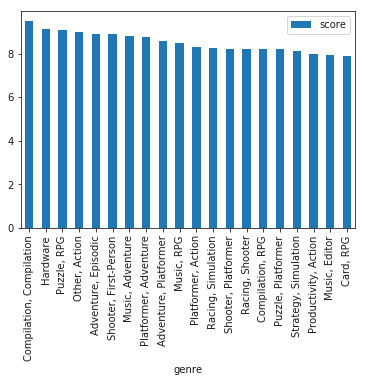

In [46]:
genre_avg = pd.DataFrame(df.groupby("genre").score.mean())
genre_avg.colnames =["genre","score"]
genre_avg.sort_values("score", ascending = False).head(20).plot(kind="bar")

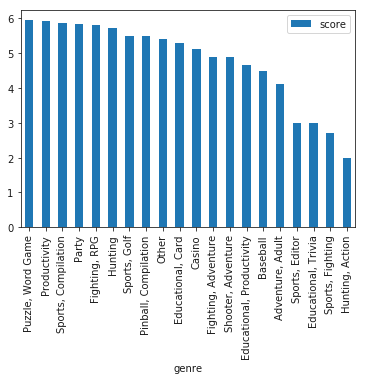

In [47]:
genre_avg.sort_values("score", ascending = False).tail(20).plot(kind="bar")

In [48]:
genre_mean = pd.DataFrame(df.groupby("genre").mean().score)
genre_mean = genre_mean.sort_values('score', ascending = False)
genre_top = genre_mean.head(10)

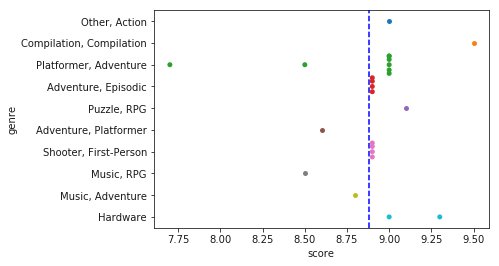

In [49]:
sns.swarmplot(x="score", y = "genre", data = df[df["genre"].isin(genre_top.index)],cmap='Set 3')
plt.axvline(df[df["genre"].isin(genre_top.index)].score.mean(),linestyle='dashed',color='blue')
plt.rcParams["axes.labelweight"] = "bold"
plt.show()

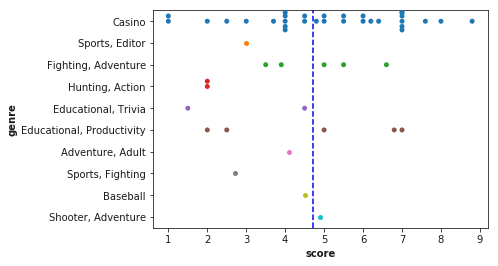

In [50]:
genre_low = genre_mean.tail(10)
sns.swarmplot(x="score", y = "genre", data = df[df["genre"].isin(genre_low.index)],cmap='Set 3')
plt.axvline(df[df["genre"].isin(genre_low.index)].score.mean(),linestyle='dashed',color='blue')
plt.rcParams["axes.labelweight"] = "bold"
plt.show()

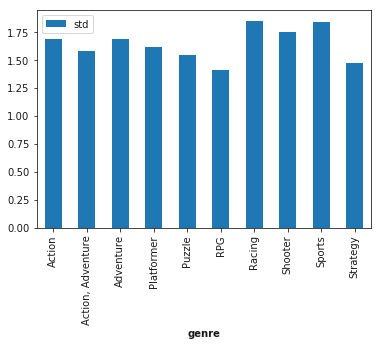

In [51]:
# plot standard deviations
genre_std = df[df["genre"].isin(top_genre.index)].groupby("genre").describe()["score"]
genre_std.plot(y="std",kind="bar")

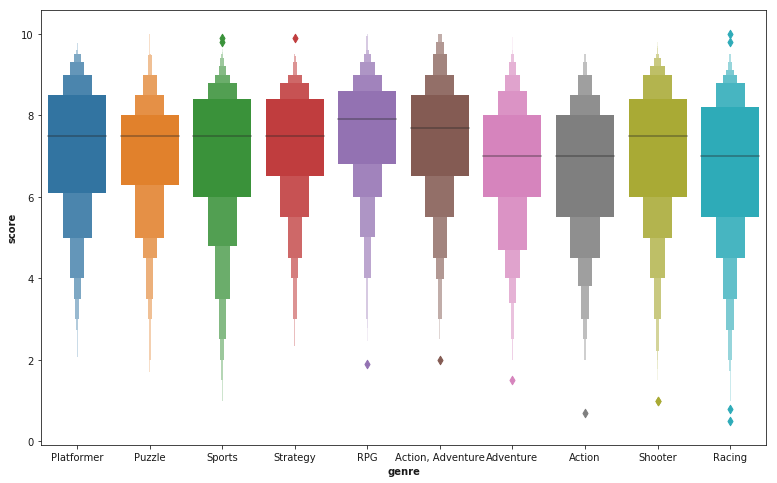

In [52]:
# revies score v.s. genres which has most games released 
plt.figure(figsize=(13,8))
sns.lvplot(x="genre", y = "score", data = df[df["genre"].isin(top_genre.index)])

## Conclusion 4:
### Review socres v.s. genres
    Top 3 review scores genres: 1) Compilation, complition 2) Hardware 3) PUzzle, RPG 
                       Worst 3: 1) Hunting, Action 2) Sports, Fighting 3) Ducation, Trivia

    The games with very high or very low average scores only has a few games released in its genre. 
    The violin plots of review score corresponding to popular genres (most games released) show that review scores 
    are roughly normally distributed with slight tail to the left (0). From the plot, sports and racing games has largest range of scores and more outliers on both sides.
    The standard deviation of review scores for Racing, Sports and Shooter games are larger than other genre's, indicating there performances are more volitile.


## Question 5: Review score v.s. genres / year

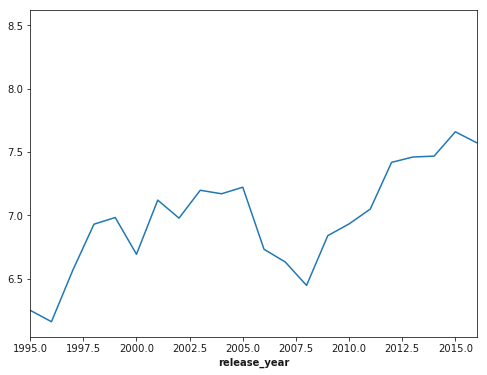

In [53]:
plt.figure(figsize=(8,6))
df.groupby(['release_year']).score.mean().plot(x="release_year",xlim = 1995, kind = "line")

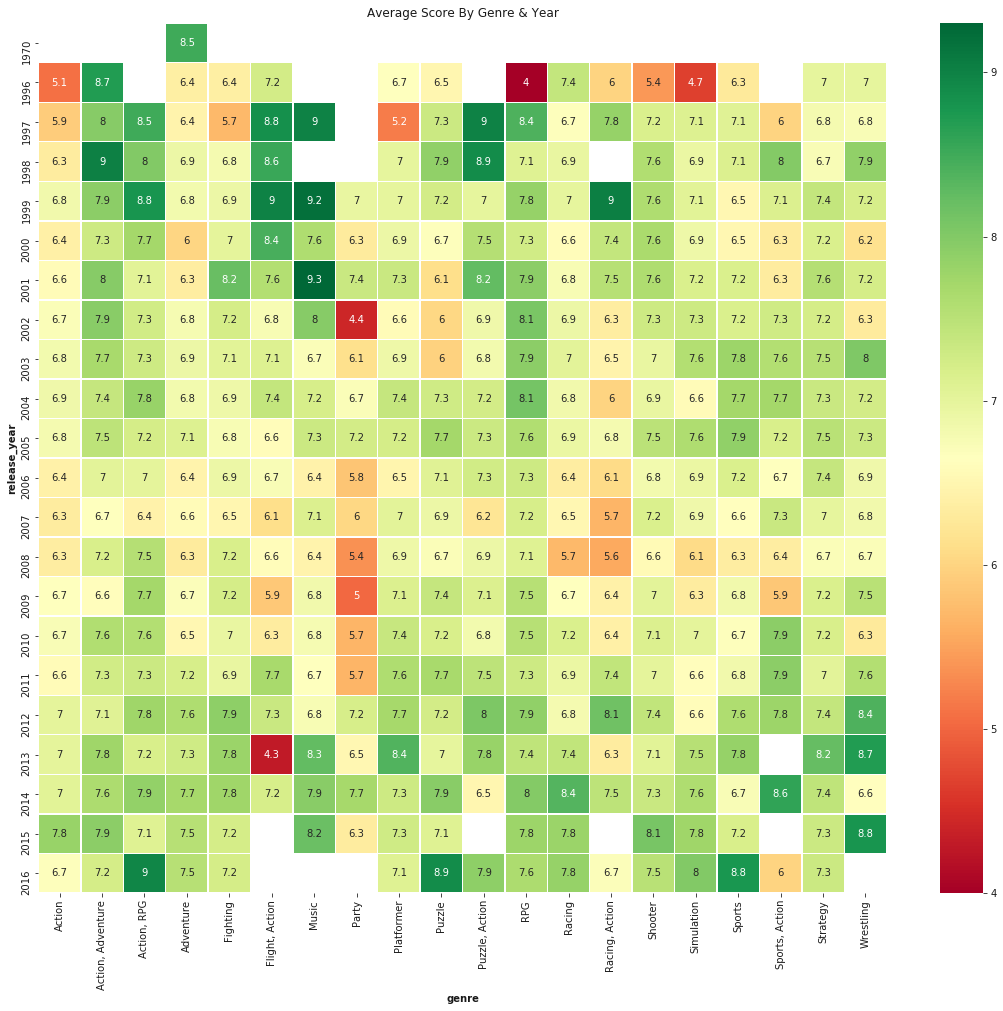

In [55]:
plt.figure(figsize=(19,16))
max_genre_counts = df.genre.value_counts().head(20)
genre_df=df[df["genre"].isin(max_genre_counts.index)]
genre_mean=genre_df.groupby(['genre','release_year']).score.mean().reset_index()
genre_mean=genre_mean.pivot('release_year','genre','score')
sns.heatmap(genre_mean,annot=True,cmap='RdYlGn',linewidths=0.4)
plt.title('Average Score By Genre & Year')

## Conclusion 4: 
### Average Review score by Year and Genre
    The average review socres continues to increase with first drop in 2000, follow by a small drop by 2002.
    The score continues to increase to 2005, and then keep decreasesing till 2008. From 2008, the score keep increasing. The lowest average scores occures in 2008.

    The heatmap also indicate that the average score for many genres in 2008 is lower than others.
    For Fight and action genre games, 2013 is the worst year. 
    


## Part 3:  Worst Games and Best Games

### Question 1: Which are the worst games in the history A. score < 1 B. game in lower 25% percent? 

In [56]:
df[df.score<=1].head(5)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
439,Revolution X,PlayStation,1.0,Action,1996-11-25,Sony,Console,1996,11,25
496,Revolution X,PlayStation,1.0,Action,1996-11-25,Sony,Console,1996,11,25
574,The Crow: City of Angels,PlayStation,1.0,Action,1997-03-11,Sony,Console,1997,3,11
770,Fantastic Four,PlayStation,1.0,Action,1997-08-29,Sony,Console,1997,8,29
848,C: The Contra Adventure,PlayStation,1.0,Action,1998-09-16,Sony,Console,1998,9,16


In [57]:
# score less or equal to 1 
df[df.score<=1].title.unique()

array(['Revolution X', 'The Crow: City of Angels', 'Fantastic Four',
       'C: The Contra Adventure', 'Extreme PaintBrawl',
       "Freestyle Boardin' '99", 'Extreme Watersports',
       'Kawasaki ATV Powersports', 'ESPN NBA 2Night',
       'The Simpsons Wrestling', 'Crime Patrol 2: Drug Wars',
       'NFL Blitz 20-03', 'Fury of The Hulk',
       'Looney Tunes: Back in Action: Zany Race',
       'Baywatch Beach Volleyball', 'High Rollers Casino',
       'NRA Varmint Hunter', 'Elf Bowling 1&2',
       'Offroad Extreme -- Special Edition',
       'Monster Trux Arenas -- Special Edition',
       'Kidz Sports: International Soccer', 'London Taxi: Rush Hour',
       'Kidz Sports: Basketball', 'Kidz Sports: Ice Hockey',
       'Fantasy Aquarium', 'Aquarium', "Backyard Baseball '09",
       'Motocross Championship', 'Action Girlz Racing', 'Mega Man 2',
       'PDC World Championship Darts', 'Hints Hunter', 'Step Up',
       'Self-Defense Training Camp'], dtype=object)

In [58]:
df[df.score<=1].type.value_counts()

Console     22
Portable     5
Others       4
Computer     4
Mobile       1
Name: type, dtype: int64

In [59]:
df[df.score<=1].genre.value_counts()

Sports            11
Action             8
Racing             7
Sports, Action     2
Shooter            2
Puzzle             2
Simulation         2
Casino             2
Name: genre, dtype: int64

In [60]:
#percentage of bad games for each company 
lower_company = pd.DataFrame(df[df.score< df.score.quantile(.25)].company.value_counts()/df.company.value_counts() * 100 )
lower_company.columns = ["Lower_Count_company"]
lower_company.sort_values("Lower_Count_company",ascending = False )

,Lower_Count_company
Nintendo,32.858546
SNK,24.390244
Sony,23.482902
Sega,21.315789
Microsoft,20.231862
Bandi,20.000000
Others,18.910964
Apple,12.526096


In [61]:
# percentage of bad games for each type
lower_type = pd.DataFrame(df[df.score< df.score.quantile(.25)].type.value_counts()/df.type.value_counts() * 100)
lower_type.columns = ["Lower_Count_type"]
lower_type.sort_values("Lower_Count_type", ascending = False)

,Lower_Count_type
Arcade,38.461538
Portable,29.420332
Console,24.274433
Computer,19.031142
Others,14.394766
Mobile,12.751678


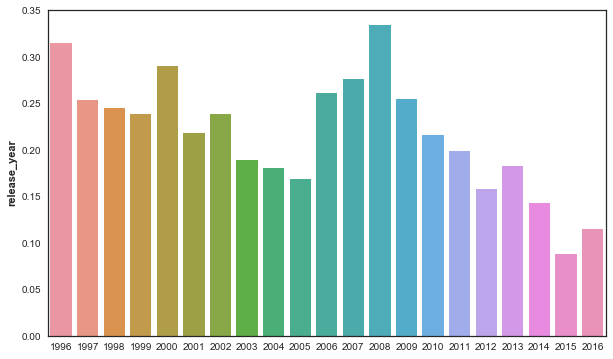

In [62]:
plt.figure(figsize=(10,6))
sns.set(style="white")
worst_year_percent = df[df.score < df.score.quantile(.25)].release_year.value_counts()/df.release_year.value_counts()
worst_year_percent = worst_year_percent.dropna()
sns.barplot(x=worst_year_percent.index, y=worst_year_percent )
#worst_year_percent.index

In [63]:
worst_year_percent.sort_values(ascending = False)

2008    0.334204
1996    0.315436
2000    0.289952
2007    0.275776
2006    0.261589
2009    0.254298
1997    0.253659
1998    0.244838
1999    0.238710
2002    0.238248
2001    0.218023
2010    0.215701
2011    0.198509
2003    0.188854
2013    0.182471
2004    0.180542
2005    0.169118
2012    0.158035
2014    0.143389
2016    0.115044
2015    0.087671
Name: release_year, dtype: float64

# Question 2: Perfect games

In [64]:
perfect10 = df[df.score==10]
perfect10.head(3)

,title,platform,score,genre,date,company,type,release_year,release_month,release_day
1058,The Legend of Zelda: Ocarina of Time,Nintendo 64,10.0,"Action, Adventure",1998-11-25,Others,Console,1998,11,25
1287,Pokemon Blue Version,Game Boy,10.0,RPG,1999-06-23,Others,Portable,1999,6,23
1289,Pokemon Red Version,Game Boy,10.0,RPG,1999-06-23,Others,Portable,1999,6,23


In [65]:
df[df.score==10].platform.value_counts()/len(perfect10)

Game Boy Color         0.181818
PlayStation 3          0.163636
PlayStation 4          0.090909
Xbox 360               0.090909
PC                     0.090909
Xbox One               0.072727
Wii                    0.072727
Game Boy               0.054545
Lynx                   0.054545
NeoGeo Pocket Color    0.036364
Wireless               0.018182
Dreamcast              0.018182
Macintosh              0.018182
Nintendo 64            0.018182
iPhone                 0.018182
Name: platform, dtype: float64

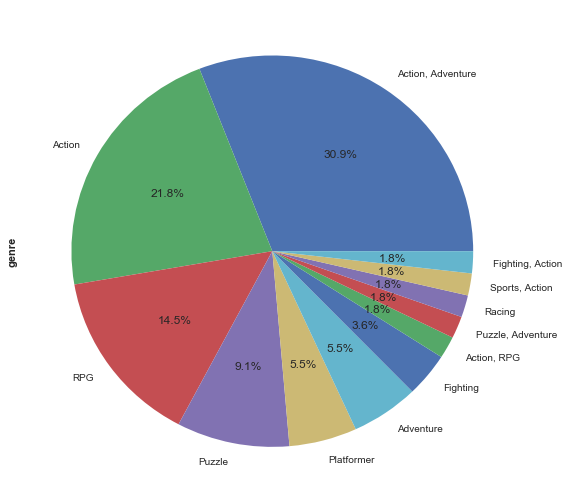

In [66]:
plt.figure(figsize=(9,9))
df[df.score==10].genre.value_counts().plot(kind="pie",autopct='%1.1f%%')

In [67]:
len(perfect10)

55

In [68]:
df[df.score==10].release_year.value_counts()/len(perfect10)

1999    0.200000
2016    0.145455
2008    0.109091
2010    0.090909
2000    0.090909
2015    0.072727
2011    0.072727
2014    0.054545
2013    0.054545
2001    0.054545
2007    0.018182
2006    0.018182
1998    0.018182
Name: release_year, dtype: float64

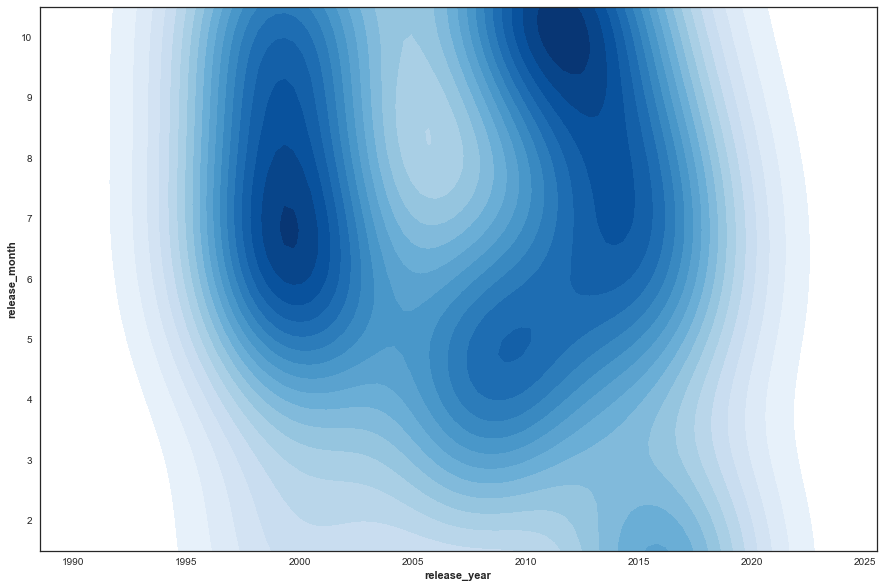

In [69]:
plt.figure(figsize=(15,10))
plt.ylim(1.5,10.5)
sns.kdeplot(perfect10.release_year, perfect10.release_month, n_levels=20, cmap="Blues", shade=True, shade_lowest=False)

## Part 3 Conclusion:
### THE WORST Games:
    32.86% of games for Nintendo falls in the range of a bad game(lower 25%)
    38.461% of games for Arcade is bad game
    33.4% of the games released in 2008 are bad games. 
### The Perfect Games:
    Total of 55 perfect games (review score = 10)
    Top platform: 18% of perfect games is designed for Game Boy Color
    Top genre: 30.9% of perfect games has genre Action, Adventure is perfect.
    Top year: Year 1999 release 20% of perfect games






# 2008 is an unique year of game history
    It is the year with most amouts of games release, yet the highest percentage of bad games released.
###### More release = More bad games? 
    So, what is the relationship between number of releases and avg review scores?
